# Week 3 Overview

This week, we will start digging into models, focusing on questions such as:

- Why do we build them?
- What do they do?
- How do we decide if they are doing their job?
- How do we improve them?

Our entry point for these questions will be linear models, a simple but useful kind of model that is ubiquitous through its presence in introductory statistics classes and Microsoft Excel. After seeing how linear models work and the sorts of errors that they make, we will dive into the trade-offs of optimizing them and how we quantify them with loss functions. And we will see how loss functions guide our models toward different solutions, a key insight that applies to the most state-of-the-art models today.

### Topic Overview

We have talked about models in vague terms so far. Recent reports about artificial intelligence make it seem that models have an almost mystical ability to understand the world. We will now describe what models do in more mundane but also more accessible terms. Using linear models as a running example, we will see examples of models fitting data and how they compensate using loss functions when they are unable to fit data perfectly. 

**Learning Objectives**

- Describe the basic purpose of building models
- Explain the common limitations of models
- Explain what residuals and loss functions are
- Calculate common loss functions

## 3.1 Lesson: What Do Models Do?

Why do we build models? We build models to predict useful information. In quantitative finance, models predict future stock prices, and traders use those predictions to buy stocks whose price they expect to go up and sell stocks whose price they expect to go down. In digital marketing, models predict the revenue per paid click and the average number of paid clicks at a given price and then combine those predictions to predict the most profitable price to bid. In meteorology, the probability of rain can be predicted, and it helps us decide whether to wear a raincoat or take an umbrella based on that probability. Other models may not make predictions that change our behavior, but the structure of those predictions helps our understanding of the world.

Right now, it is simplest to think of models returning a number predicting a numeric value of interest. But later on, you will see them predicting specific outcomes (e.g., sunny or rainy?) or probabilities of different outcomes (e.g., 65% sunshine, 35% rain). The following table gives some examples of what might be predicted in different fields.

**Table 1:** *Example Predictions*

| Field | Predictions |
| :--- | :--- |
| Finance | Future Price (expected), probability of stock price increasing by at least 10% |
| Digital Marketing | Revenue per paid click, average daily clicks at given price |
| Meteorology | Sunny or cloudy tomorrow, probability of rain, expected number of inches of rain, prediction range of inches of snow|
| Agriculture | Next season's crop yield in kg per acre, average market price for selling crop after next season |
| Insurance | Mortality rates by sex, age, and smoking behavior in the next year. |
| Retail | Average unit sales per item at current prices, average unit sales per item if there is a 20% off sale |

### Read | Mathematics for Machine Learning, Chapters 8-8.1: When Models Meet Data. Read about the concepts used to link model inputs and outputs.

In the first part of the book, we introduced the mathematics that form
the foundations of many machine learning methods. The hope is that a
reader would be able to learn the rudimentary forms of the language of
mathematics from the first part, which we will now use to describe and
discuss machine learning. The second part of the book introduces four
pillars of machine learning:

- Regression (Chapter 9)
- Dimensionality reduction (Chapter 10)
- Density estimation (Chapter 11)
- Classification (Chapter 12)

**8.1 Data, Models, and Learning**

The main question of machine learning is "what do we mean by good models?" This chapter covers a few necessary bits
and pieces of mathematical and statistical language that are commonly used to talke about machine learning models. There are two different sense in which we use the phrase "machine learning algorithm": `Training` and `Prediction`.

**8.1.1 Data as Vectors**

We assume that our data can be read by a computer and represented adequately in a numerical format. 
- Data is assumed to be tabular, but in recent years machine learning has been applied to many types of data that do not obviously come in a tabular format.
- Even when we have data in a tabular format, there are still choices to be made to obtain a numerical representation.
- Even numericalical data that could potentially be directly read into a machine learning algorithm should be carefully considered for units, scaling, and constraints.
- Representing data as vextors $x_{n}$ allows us to use concepts from linear algebra.
- In many machine learning problems, we also need to be able to compare two vectors. The comparision of two vectors requires that we construct a geometry and allows us to optimize the resulting learning problem.
- Since we have vector representations of data, we can manipulate data to find potentially better representations of it. We will discuss finding good representations in two ways: finding lower-dimensional approximations of the original feature vector, and using nonlinear higher-dimensional combinations of the original feature vector. 

**8.1.2 Models as Functions**

Once we have data in an appropriate vector representation, we can get to the business of constructing a predictive function, known as a *predictior*. A predictor is a function that, when given a particular input example
(in our case, a vector of features), produces an output. For now, consider the output to be a single number, i.e., a real-valued scalar output. This can be written as:

$$ f : \mathbb{R}^D \to \mathbb{R} $$

Where the input vector $x$ is $D$-dimensional (has $D$ features), and the function $f$ then applied to it (written as $f(x)$) returns a real number. The below formula illustrates a possible function that can be used to compute the
value of the prediction for input values $x$. In this book, we do not consider the general case of all functions, which would involve the need for functional analysis. Instead, we consider the special case of linear functions

$$ f(x) = \theta^\top x + \theta_0 $$

for unknown $\theta$ and $\theta_{0}$. 


**8.1.3 Models as Probability Distributions** 

We often consider data to be noisy observations of some true underlying effect, and hope that by applying machine learning we can identify the signal from the noise. This requires us to have a language for quantifying the effect of noise. We often would also like to have predictors that express some sort of uncertainty, e.g., to quantify the confidence we have about the value of the prediction for a particular test data point. Figure 8.3 illustrates the predictive uncertainty of the function as a Gaussian distribution.

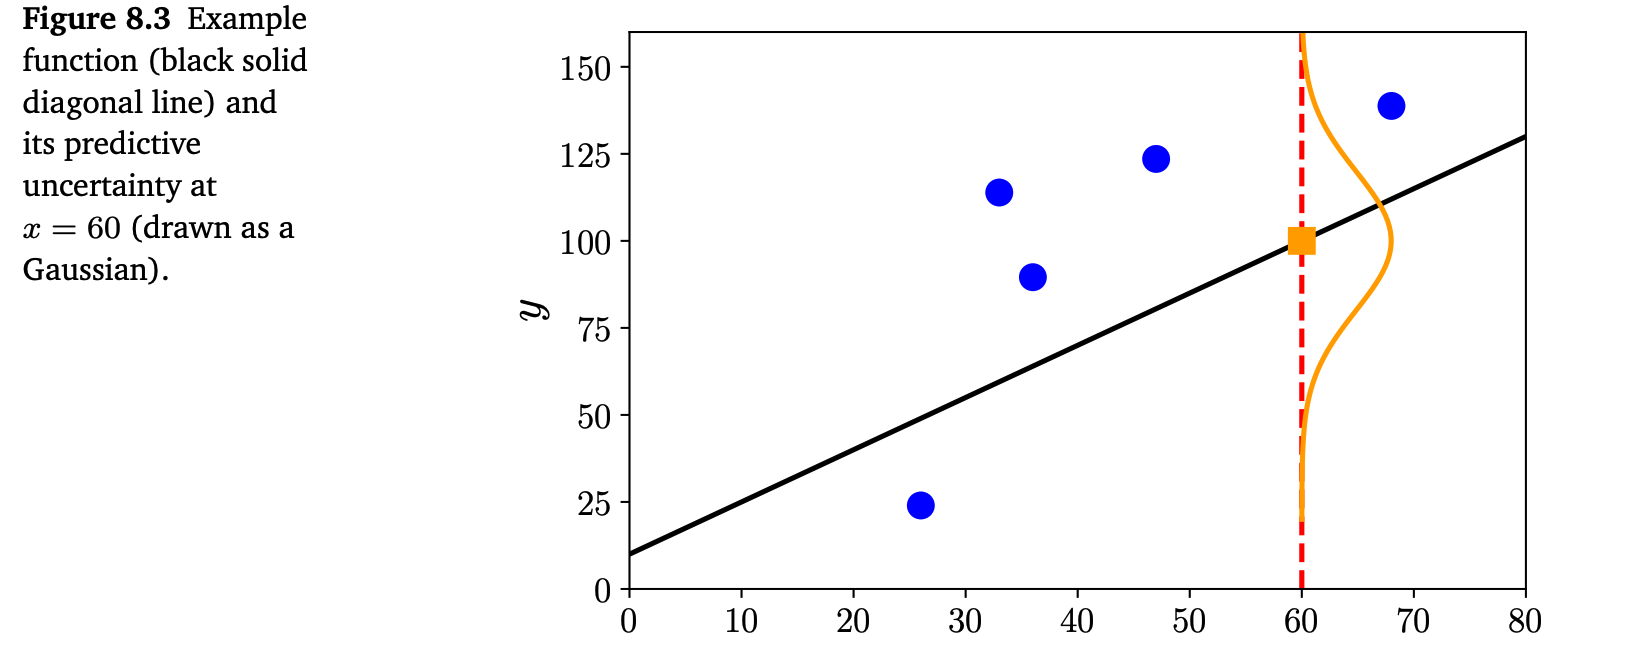

Instead of considering a predictor as a single function, we could consider predictors to be probabilistic models, i.e., models describing the distribution of possible functions.

**8.1.4 Learning is Finding Parameters**

The goal of learning is to find a model and its corresponding parameters such that the resulting predictor will perform well on unseen data. There are conceptually three distinct algorithmic phases when discussing machine learning algorithms:
1. Prediction or inference
2. Training or parameter estimation
3. Hyperparameter tuning or model selection

- The prediction phase is when we use a trained predictor on previously unseen test data. In other words, the parameters and model choice is already fixed and the predictor is applied to new vectors representing new input data points.
- Remark. Unfortunately, there is no agreed upon naming for the different algorithmic phases. The word “inference” is sometimes also used to mean parameter estimation of a probabilistic model, and less often may be also used to mean prediction for non-probabilistic models.
- The training or parameter estimation phase is when we adjust our predictive model based on training data. We would like to find good predictors given training data, and there are two main strategies for doing so: finding the best predictor based on some measure of quality (sometimes called finding a point estimate), or using Bayesian inference. Finding a point estimate can be applied to both types of predictors, but Bayesian inference requires probabilistic models.
- For the non-probabilistic model, we follow the principle of *empirical riskminimization minimization*. Empirical risk minimization directly provides an optimization problem for finding good parameters. With a statistical model, the principle of *maximum likelihood* is used to find a good set of parameters. We can additionally model the uncertainty of parameters using a probabilistic model, which we will look at in more detail in Section 8.4.
- We use numerical methods to find good parameters that “fit” the data, and most training methods can be thought of as hill-climbing approaches to find the maximum of an objective, for example the maximum of a likelihood.
- we are interested in learning a model based on data such that it performs well on future data. It is not enough for the model to only fit the training data well, the predictor needs to perform well on unseen data. We simulate the behavior of our predictor on cross-validation future unseen data using *cross-validation*.
- We often need to make high-level modeling decisions about the structure of the predictor, such as the number of components to use or the class of probability distributions to consider. The choice of the number of components is an example of a *hyperparameter*, and this choice can affect the performance of the model significantly.
- The problem of choosing among different models is called *model selection*. For non-probabilistic models, model selection is often done using *nested cross-validation*. 

## 3.2 Lesson: Data for Modeling

Most modeling problems have distinct input columns and output columns, and we want our models to use the values in the input columns to predict the values in the output columns. More specifically, given the input column values for one row, the model should predict the output column values for the same row.

The following table gives an example from a dataset that we developed for this course. For this dataset, we asked some people to rate mangos based on how green they were, how yellow they were, how soft they were, whether they were wrinkled, and how good the mangos tasted. The first four labels were provided by people acting as labelers, before the mangos were cut open. The last value, the flavor, was provided by a separate but overlapping set of people after the mangos were cut open.

Table 1: Sample Mango Dataset

In [61]:
import pandas as pd
table_1 = {"Green Rating": [1,1,2,3], "Yellow Rating": [5,5,4,3], "Softness": [4,5,3,2], "Wrinkles": [0,1,1,0], 
           "Rated Flavor": [5,1,3,2]}
table_1df = pd.DataFrame(table_1)
table_1df

,Green Rating,Yellow Rating,Softness,Wrinkles,Rated Flavor
0,1,5,4,0,5
1,1,5,5,1,1
2,2,4,3,1,3
3,3,3,2,0,2


Our goal modeling this dataset is to predict the flavor rating before cutting open the mango. Ideally, we could use this model to make an app to pick the best tasting mangos at the grocery store and never buy a sour, unripe mango again. 

Traditionally, we usually put the input columns on the left and the output columns on the right. We often split the table in two on that boundary, resulting in an input table and an output table. (It is important to preserve the row order during this split.) We usually represent the data in the input and output tables as the variables X and Y, respectively.

In [48]:
table_2df = table_1df.drop(columns="Rated Flavor")
table_2df

,Green Rating,Yellow Rating,Softness,Wrinkles
0,1,5,4,0
1,1,5,5,1
2,2,4,3,1
3,3,3,2,0


In [63]:
table_3df = pd.DataFrame(table_1df["Rated Flavor", 'Yellow Rating'])
table_3df

KeyError: ('Rated Flavor', 'Yellow Rating')

When we are building a model of this data, we are trying to construct a function $f$ such that calling $f$ on the $ith$ row of $X$ is approximately the $ith$ value of $Y$. That is,

$$ \forall_i f(X_{i,0}, \dots, X_{i,n-1}) \approx Y_i $$

We will be more specific about "trying to construct” and “approximately” shortly. 

This setup for building a model with known inputs and outputs is called “supervised” learning. Here, “supervised” refers to providing the output columns as targets for the model. In contrast, “unsupervised” learning with the same dataset would not be focused on predicting the output columns. Unsupervised learning would hopefully learn the relationship between the input columns and output columns, but unsupervised learning can learn many more properties of the dataset, such as what is the distribution of different ratings and relationships between the inputs (e.g., green mangos are rarely soft). Historically, most modeling has been supervised learning with designated inputs and outputs, but unsupervised learning has become very popular in recent years.

## 3.3 Lesson: Formalizing Models

### Definition: function

A function is a mathematical object that maps values from one set to values in another set. Given a function $f$ and input $x$, the output of function $f$ is denoted $f(x)$.

This $f(x)$ notation is meant to be interpreted literally; there are few general limits on what an acceptable $f$ or $s$ would be. In particular, we allow $x$ to represent more than one number. For those cases, we often say $x$ consists of mulitple variables or is avector of numbers. In those cases, we usually write $f(x)$, using the vector notation to make use of the multiple values clear. 

### Definition: function domain

The domain of a function is the set of all valid inputs to the function.

If function $f$ has domain $x$, then for all $x \in X, f(x)$ is defined. (The notation $x \in X$ means that $x$ is an element of $X$, or $x$ is in $X$.) In other words, the domain of the $f$ is the only limit on inputs to $f$, and it comes from the definition of $f$.

This notation is often used a bit loosely to ignore cases where the usual formula for $f$ is not defined. The most common cases involve division by zero, e.g.,

$$ f(x) = \frac{1}{x} $$

In this case, the domain of $f$ is technically $\mathbb{R} \setminus \{0\}$, the set of real numbers minus zero, but usually we just say the domain of $f$ is $\mathbb{R}$, the set of real numbers.

### Definition: function codomain

The codomain of a function is a set containing all the outputs of a function.

If a function has domain $X$ and codomain $Y$, then for all $x \in X$,

$$ f(x) \in Y $$

That relationship is often written as $$ f : X \to Y. $$

### Definition : function range

The range of a function $f$ is the set of all possible outputs of $f$

$$ \text{range}(f) = \{ y \mid \exists x (f(x) = y) \} $$

Translating that formula literally, the range of $f$ is the set of valyes $y$ such that an $x$ exists that $f(x) = y$. 

If $f : X \to Y, \, \text{range}(f) \subseteq Y $. However, the range and the stated codomain are not necessarily equal. For example, consider the sine function from trigonometry. The sine function can be described with $sin: \mathbb{R} \to \mathbb{R}$. However, the outputs of the sine function are strictly limited to be between -1 and 1 and may take either of those values and any in between them, so

$$ \text{range(sin)} = [-1,1]$$

This means we could also write

$$ \text{sin} : \mathbb{R} \to[-1,1] $$

Which is more specific than

$$ \text{sin} : \mathbb{R} \to \mathbb{R} $$

but either is acceptable and strictly correct.

It is common to see the word “range” used where the word “codomain” should have been used since they are often the same sets. Usually this is clear from the context.

### Defintion: functional form

A functional form is a template for calculating a function that can be combined with parameters to specify a function. For example, we could have a functional form for constant functions producing constant functions, each of which has the same outputs for all inputs. Or we could have a functional form for exponential functions, where each resulting function has an output defined as $bx$ for some constant $b$ specific to the function.

### Definition: parameterized function

A parameterized function consists of a choice of a functional form and a choice of all the parameters necessary to identify a specific function with that functional form.

Following the previous examples, we could define a parameterized constant function

$$ f_{c}(x) = c $$

Where $x$ is a constant for any particular function, but there is a different $f_{c}$ for each possible $c$.

Of we could define a parameterized exponential function.

$$f_{b}(X) = b^x $$

We will often use function subscripts to denote the parameter choices like in these examples and sometimes omit them when the choices are clear from the context. You will also see other notations such as $f (b , x)$ or $f(x ; b)$ to describe parameterized functions in various resources.

Parameterized functions are a central concept in modeling.

## Model Definition
### Definition: model

A model is a choice of a function family and a choice of all the parameters for that function family, where the choice of parameters is intended to make the parameterized function from those choices estimate a desired function.

In a way, a model is a wrapper around parameterized functions where the goal is to find the best parameterization to match a target function. After picking the functional form, the modeling process adjusts the parameters in some systematic fashion so that the resulting parameterized function has better outputs. We will talk about quantifying better outputs shortly.

When we talk about the output of a model, or applying a model to inputs, we mean applying the parameterized function from the model's current choice of parameters to those inputs.

# 3.4 Lesson: Linear Models

## Defining Linear models

Linear models are one of the simplest kinds of models. Their only requirement is to have all the data in numerical form, and they return numerical predictions. The only computation to predict with a linear model is one multiplication and one addition per column, so they are pretty cheap to compute. We will use linear models as our first concrete model examples this week, and later on in this module, we will see that they have a simple analytical solution based on linear algebra.

### Definition: linear function

A linear function is a function with the following functional form for inputs with $n$ values 

$$ f_c(\mathbf{x}) = \sum_{i=0}^{n-1} (x_i * c_i) + c_n $$

where the parameters $c$ are a vector of $𝑛+1$ real numbers.

We often refer to those parameters as coefficients, since they are the coefficients of the $x_{i}$ variables if we write out the whole summation. The last parameter, $c_{n}$, is also referred to as an additive constant, since it is not multiplied by any $x_{i}$ variables and changing it adds or subtracts from the function output uniformly.

### Definition: linear model

A linear model is a model optimizing a linear functional form to match the target data.

Linear models predict their outputs using a linear function. Linear models will be our baseline model for comparison and will be surprisingly powerful, especially when provided with good features.

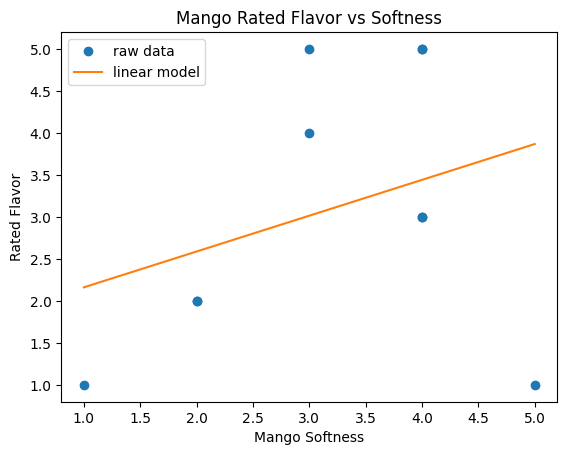

### Predicting with linear models 

Code example emphasizing the relationship between variables and model coefficients

In [50]:
'''
import csv

with open('mango-tiny.tsv') as mango_file:
    mango_reader = csv.DictReader(mango_file, dialect="excel-tab")
    
'''

mango_dict = {'green_rating': 1, 'yellow_rating': 5, 'softness': 4, 'wrinkles': 0, 'estimated_flavor': 4, 
                'estimated_sweetness' : 4, 'rated_flavor': 5}

model = {'estimated_flavor': 0.8, 'estimated_sweetness' : 0.2, 'wrinkles': -0.2}

def predict(row):
    return sum(float(row[k]) * model.get(k,0) for k in row)

[predict(mango_dict)]


[4.0]

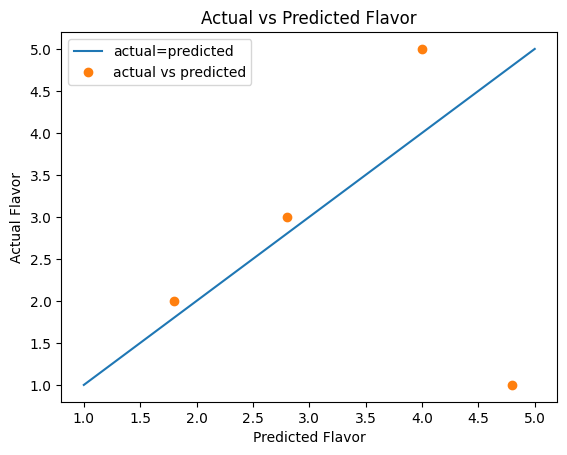

### Interpreting linear models

$x_{4}^{2}$

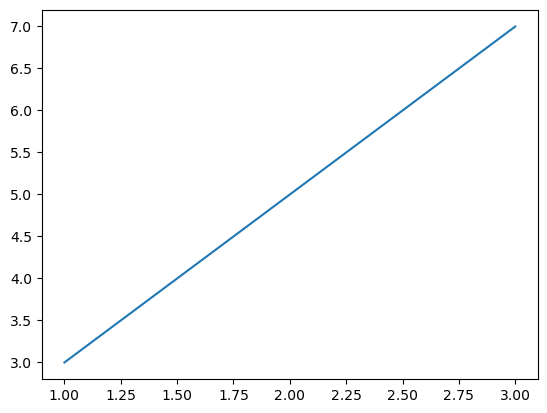

In [51]:
import matplotlib.pyplot as plt
plt.plot([1,2,3],[3,5,7])

# Topic Overview: Managing Model Errors

The previous lesson about linear models left an open question: How do we pick a model’s parameters when we cannot fit all the data points exactly? The standard approach now is called empirical risk minimization, due to Vladimir Vapnik. In brief, empirical risk minimization uses a loss function to quantify the cost of an incorrect prediction and picks the model parameters minimizing the average of the loss function on the training data. If there is enough training data and it is representative of the true distribution, empirical risk minimization will converge to picking the model parameters minimizing the loss function for that distribution. 

**Learning Objectives**

By the end of this topic, you should be able to:
- Describe the basic purpose of building models
- explain the common limitations of models
- Explain what risiduals and loss functions are
- calculate common loss functions

**Think about it** 

- Different prediction problems have different costs of prediction errors. How do those costs grow for bigger mistakes?
- Is there a threshold below which prediction errors do not matter?
- Is there a point where prediction errors over a threshold should be avoided at all costs?

### Definitions
**Loss Function**

The loss function, $\text{Loss}(f(x),y)$, is the application-specific function estimating the loss or cost from predicting $f(x)$ when the true target value is $y$.

In practice, loss functions have simplified functional forms, and, for example, skip multiplicative and additive constants that will not change the relative performance of different choices of model parameters.

**Empirical Risk**

The empirical risk of a model making predictions with $f$ is $\text{mean}(\text{Loss}(f(x),y))$ for $x,y$ in the training data. 

**Regression**

Regression is the process of picking model parameters to best fit the observed relationship between input variables and target outputs in the training data.

The best fit is defined by a loss function, and the specifics of how regression proceeds will vary depending on the choices of functional form and loss function.

**Empirical risk minimization**

Empirical risk minimization is the principle that models should be optimized to reduce the empirical risk on the training data. As such, models are most likely to perform well on similar data.

What is the difference between empirical risk minimization and regression? Regression is the process of picking the model parameters to minimize the loss on the training data. Empirical risk minimization says that the model should be chosen to minimize the loss on the training data. So regression answers the question "What to do?" and empirical risk minimization answers the question "Why?"

The success of empirical risk minimization depends on three factors: 

1. The data available for training
2. How the model uses the parameters to compute a prediction, also known as the functional form
3. The loss function


Of these three, the training data is typically fixed (at least in the short term), the functional form is usually limited to a modest number of choices (just linear models in this module so far), and the loss function needs to be chosen with care. This is because the loss function essentially prioritizes what errors to fix by optimizing the parameter choices. And in practice, this choice is heavily dependent on the problem at hand and is mostly independent of the functional form. The remainder of this lesson will focus on loss functions and their impact on model optimization.

### Mathematics for Machine Learning: Linear Regression

This chapter covers linear regression with more formalisms than we’ve built up so far. The introductory section talks about the challenges between picking a model type and picking the best parameters.

- In *regression*, we aim to find the function $f$ that maps inputs $x \in \mathbb{R}^{D}$ to corresponding function values $x \in \mathbb{R}$.
- We assume we are given a set of training inputs $x_{n}$ and corresponding noisy observations $yn = f(xn)+\in$, where $\in$ is an i.i.d. random variable that describes measurement/observation noise and potentially unmodeled processes.
- Our task is to find a function that not only models the training data, but generalizes well to predicting function values at input locations that are not part of the training data.

A typical regression setting is given in Figure 9.1(a): For some input values $x_{n}$, we observe (noisy) function values $y_{n} = f(x_{n}) + \in$. The task is to infer the function $f$ that generated the data and generalizes well to function values at new input locations.




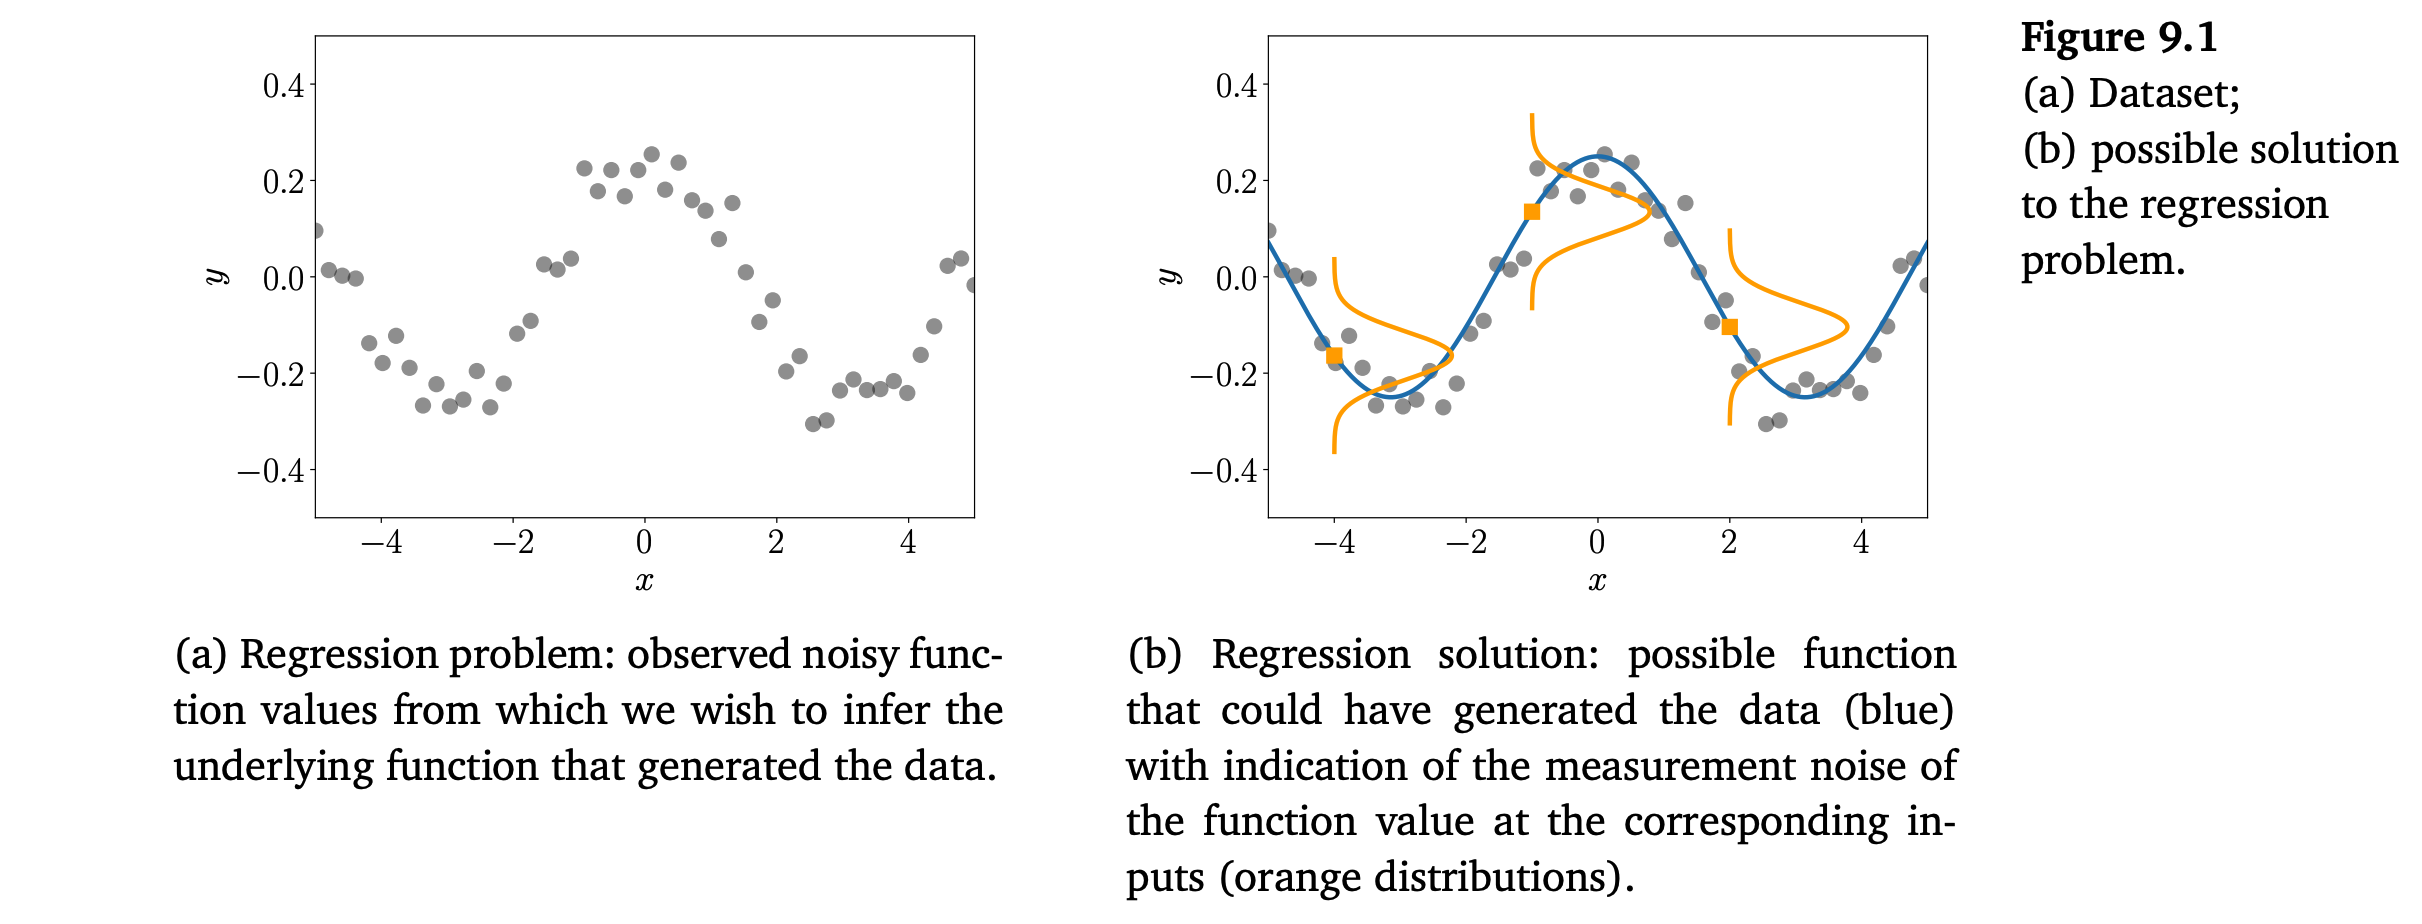

Regression is also a key ingredient of classification algorithms. Finding a regression function requires solving a variety of problems, including the following:

- Choice of the model (type) and the parametrization of the regression function. Given a dataset, what function classes (e.g., polynomials) are good candidates for modeling the data, and what particular parametrization (e.g., degree of the polynomial) should we choose?
- Finding good parameters. Having chosen a model of the regression function, how do we find good model parameters? Here, we will need to look at different loss/objective functions (they determine what a “good” fit is) and optimization algorithms that allow us to minimize this loss.
- Overfitting and model selection. Overfitting is a problem when the regression function fits the training data “too well” but does not generalize to unseen test data. Overfitting typically occurs if the underlying model (or its parametrization) is overly flexible and expressive; see Section 8.6. We will look at the underlying reasons and discuss ways to mitigate the effect of overfitting in the context of linear regression.
- Relationship between loss functions and parameter priors. Loss functions (optimization objectives) are often motivated and induced by probabilistic models. We will look at the connection between loss functions and the underlying prior assumptions that induce these losses.
- Uncertainty modeling. In any practical setting, we have access to only a finite, potentially large, amount of (training) data for selecting the model class and the corresponding parameters. Given that this finite amount of training data does not cover all possible scenarios, we may want to describe the remaining parameter uncertainty to obtain a measure of confidence of the model’s prediction at test time; the smaller the training set, the more important uncertainty modeling. Consistent modeling of uncertainty equips model predictions with confidence bounds.


### Principles of Risk Minimization for Learning Theory

This paper by Vladimir Vapnik introduced the term empirical risk minimization, generalizing some previous practices. Just read the first three pages.

The structure of the theory of learning differs from that of most other theories for applied problems. The search for a solution to an applied problem usually requires the three following steps:

1. State the problem in mathematical terms.
2. Formulate a general principle to look for a solution to the problem.
3. Develop an algorithm based on such general principle.

The first two steps of this procedure offer in general no major difficulties; the third step requires most efforts, in developing computational algorithms to solve the problem at hand.

In the case of learning theory, however, many algorithms have been developed, but we still lack a clear understanding of the mathematical statement needed to describe the learning procedure, and of the general principle on which the search for solutionsshould be based. This paper is devoted to these first two steps, the statement of
the problem and the general principle of solution. 
### 2 Function Estimate Model

The learning process is described through three components:
1. A generator of random vectors $z$, drawn independently from a fixed but unknown distribution $P(x)$.
2. A supervisor which returns an output vector $y$ to every input vector $x$, according to a conditional distribution function $P(y|x)$, also fixed but unknown.
3. A learning machine capable of implementing a set of functions $f(x,w), w \in W$

The problem of learning is that of choosing from the given set of functions the on which approximates best the supervisor's response. The selection is based on a training set of e independent observations: 

$$ (x_{1}, y_{1}) , ... ,(x_{l}, y_{l}). $$

The formulation given above implies that learning corresponds to the problem of function approximation.

### 3 PROBLEM OF RISK MINIMIZATION

In order to choose the best available approximation to the supervisor's response, we measure the loss or discrepancy $( L(y, f(x, w)) $ between the response $y$ of the supervisor to a given input $x$ and the response $( f(x, w)$ provided by the learning machine. Consider the expected value of the loss, given by the risk functional:

$$
R(w) = \int L(y, f(x, w)) dP(x, y).
$$

The goal is to minimize the risk functional $R(w$ over the class of functions $f(x, w), w \in W$. But the joint probability distribution \( P(x, y) = P(y|x)P(x) \) is unknown and the only available information is contained in the training set

### 4 EMPIRICAL RISK MINIMIZATION

In order to solve this problem, the following induction principle is proposed: the risk functional $R(w)$ is replaced by the empirical risk functional

$$
E(w) = \frac{1}{\ell} \sum_{i=1}^{\ell} L(y_i, f(x_i, w))
$$

constructed on the basis of the training set (1). The induction principle of empirical risk minimization (ERM) assumes that the function $f(x, w^*)$, which minimizes $E(w)$ over the set $w \in W$, results in a risk $R(w^*)$ which is close to its minimum.

This induction principle is quite general; many classical methods such as least squares or maximum likelihood are realizations of the ERM principle.

The evaluation of the soundness of the ERM principle requires answers to the following two questions:

1. Is the principle consistent? (Does $R(w^*)$ converge to its minimum value on the set $w \in W$ when $\ell \to \infty$?)

2. How fast is the convergence as $\ell$ increases?

The answers to these two questions have been shown (Vapnik et al., 1989) to be equivalent to the answers to the following two questions:

1. Does the empirical risk $E(w)$ converge uniformly to the actual risk $R(w)$ over the full set $f(x, w), w \in W$? Uniform convergence is defined as

$$ \text{Prob} \left\{ \sup_{w \in W} |R(w) - E(w)| > \epsilon \right\} \to 0 \quad \text{as} \quad \ell \to \infty. $$

2. What is the rate of convergence?

It is important to stress that uniform convergence (4) for the full set of functions is a **necessary** and **sufficient** condition for the consistency of the ERM principle.

### 5 VC-DIMENSION OF THE SET OF FUNCTIONS

The theory of uniform convergence of empirical risk to actual risk developed in the 70's and 80's, includes a description of necessary and sufficient conditions as well as bounds for the rate of convergence (Vapnik, 1982). These bounds, which are independent of the distribution function $P(x, y)$, are based on a quantitative measure of the capacity of the set of functions implemented by the learning machine: the VC-dimension of the set.

For simplicity, these bounds will be discussed here only for the case of binary pattern recognition, for which $y \in \{0, 1\}$ and $f(x, w), w \in W$ is the class of indicator functions. The loss function takes only two values $L(y, f(x, w)) = 0$ if $y = f(x, w)$ and $L(y, f(x, w)) = 1$ otherwise. In this case, the risk functional (2) is the probability of error, denoted by $P(w)$. The empirical risk functional (3), denoted by $\nu(w)$, is the frequency of error in the training set.

The VC-dimension of a set of indicator functions is the maximum number $h$ of vectors which can be shattered in all possible $2^h$ ways using functions in the set. For instance, $h = n + 1$ for linear decision rules in $n$-dimensional space, since they can shatter at most $n + 1$ points.

# 3.7 Lesson: Loss Functions and what they optimize

Empirical risk minimization uses loss functions to pick model parameters, but what are loss functions supposed to measure? The following table gives examples of real-world losses from model errors.


**Table 1:** *Losses from Model Errors*

| Model Prediction Target | Real-World Loss from Prediction Errors |
| :--- | :--- |
| Tomorrow's Stock Prices | Trading loss from stocks bought today that did not go up as predicted. |
| Crop price forecasts after next growing season | Missed profits from not growing a crop that would have been more profitable. This loss is dependent on multiple crop predictions, assuming that the crops expected to be most profitable are grown. |
| Forecasting meal orders | Spending too much on ingredients that go bad, or foregoing profits from not being able to make what customers want. |
| Next train arrival time | Missing the train and spending more money for another ticket and possibly arriving late to the destination or appointment. |

In practice, real-world losses are messy and hard to quantify, so we often use simpler loss functions, which we find easier to reason about. These simpler loss functions are defined in turn using residuals, which are defined below.

**Definitions**
- **Residual**: Given a modeling function f, input x, and true target y, the residual on input $x$ is $y - f(x)$. The residual is literally the difference (subtraction) between the target and prediction. Residuals are sometimes called errors.
- **L1 loss function**: The L1 loss is the absolute value of the residual, so $L1(f(x), y) = |f(x) - y|$.
- **L2 loss function** . The L2 loss is the square of the residual, so $L2(f(x), y) = (f(x) - y)^2$. This is the most common loss function.

We will see that the L1 and L2 loss functions are opinionated in their own ways and also can be related to the statistics discussed last week, namely the median and mean.


### Optimizing the L2 Loss

Visualize the L2 loss function for a dataset and discusses its connection to the dataset’s average. The moss common loss function is the L2 loss function. The L2 loss function is computed by summing the square of the residuals. So if the predictions are far from the targets in either direction, there will be a large penalty. Optimizing a model for L2 loss gives a bias torward many small errors over a few very large losses. 

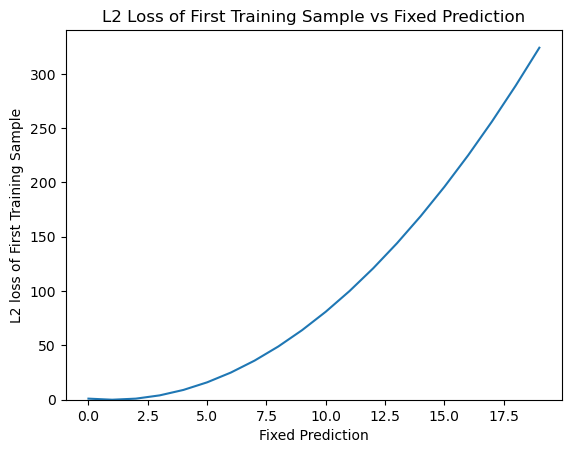

In [52]:
import matplotlib.pyplot as plt

data = [1, 2, 4, 6, 12] #data points
xs = list(range(20)) #loss

#plot the loss for the first data point's predictions
plt.plot(xs, [(x - 1) **2 for x in xs])
plt.gca().set_ylim(0)
plt.title("L2 Loss of First Training Sample vs Fixed Prediction")
plt.xlabel("Fixed Prediction")
plt.ylabel("L2 loss of First Training Sample")
None

Here the x-axis is our fixed prediction. Let's look at the loss over each of our data points. 

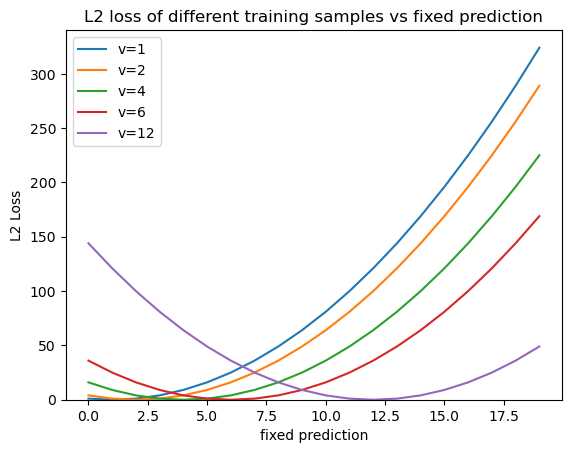

In [53]:
for v in data:
    plt.plot(xs, [(x - v)**2 for x in xs], label=f"v={v}")

plt.gca().set_ylim(0)
plt.legend()
plt.title("L2 loss of different training samples vs fixed prediction")
plt.xlabel("fixed prediction")
plt.ylabel("L2 Loss")
None

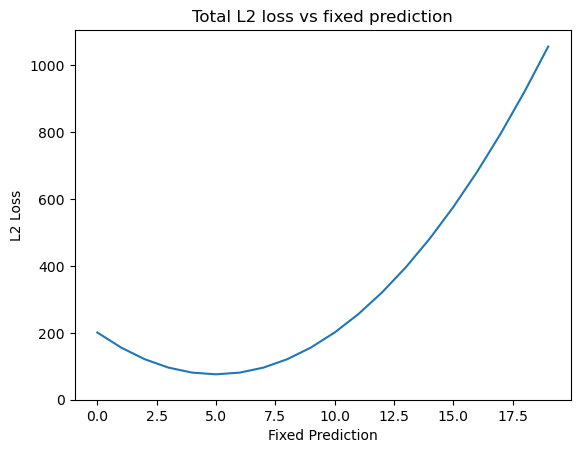

In [54]:
#that's a little hard to read, so let's look at the sum:
plt.plot(xs, [sum((x-v)**2 for v in data) for x in xs])
plt.gca().set_ylim(0)
plt.title("Total L2 loss vs fixed prediction")
plt.xlabel("Fixed Prediction")
plt.ylabel("L2 Loss")
None

Now there is a clear label where the loss is smallest. According to this chart, the loss value is minimized for a fixed prediction of five. What would you think if I said that 5 is the average of this dataset? It turns out that the L2 loss is closely connected to averaging. In this case where we have a fixed prediction, the L2 loss is optimized if that fixed prediction is the average of the targets. 

If we have a linear model, but only two different x input values, then the model will pick the line going through the average target for each x value. That way, it minimizes the loss function for both x values simultaneously. That generally won't work with three x values, since you can't guarantee that all 3 points will be on the same line. 

### Optimizing the L1 Loss

Visualize the L1 Loss function fo ra dataset and discuss it's connection to the dataset's median. Let's look at the L1 loss function with the same dataset.

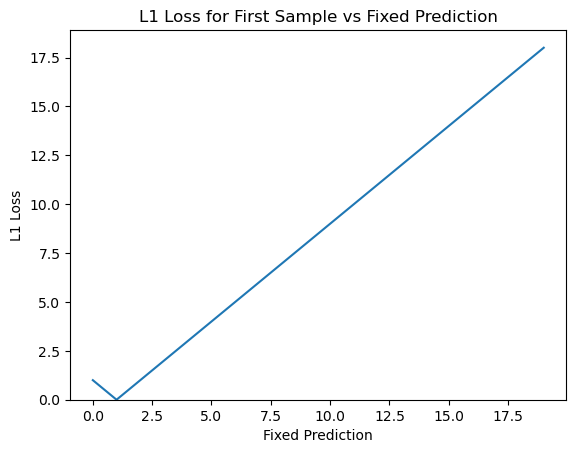

In [55]:
data = [1, 2, 4, 6, 12] #data points
xs = list(range(20)) #loss

plt.plot(xs, [abs(x-1) for x in xs])
plt.gca().set_ylim(0)
plt.title("L1 Loss for First Sample vs Fixed Prediction")
plt.xlabel("Fixed Prediction")
plt.ylabel("L1 Loss")
None

With the L1 loss and one data point, the loss is going down if the prediction is too low, and going up if the prediction is too high. Let's jump to all of them at once. 

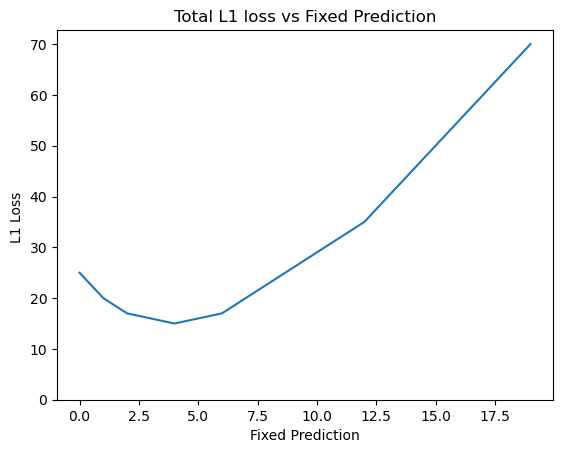

In [56]:
plt.plot(xs, [sum(abs(x - v) for v in data) for x in xs])
plt.gca().set_ylim(0)
plt.title("Total L1 loss vs Fixed Prediction")
plt.xlabel("Fixed Prediction")
plt.ylabel("L1 Loss ")
None

Again, there is a clear minimum in the loss function. With this data, it is at 4. Any guesses why it's at 4? The minimum is at 4 because the L1 loss if optimized at the median of the data set. When the prediction is below 1, then the loss for then the loss for each data point is decreasing as you increase the prediction. So the total loss goes down quickly. But when your prediction passes one, then the loss for one data point switches from increasing to decreasing, to the total decreases more slowly.

Let's look at the loss function calculated from just the first two data points.

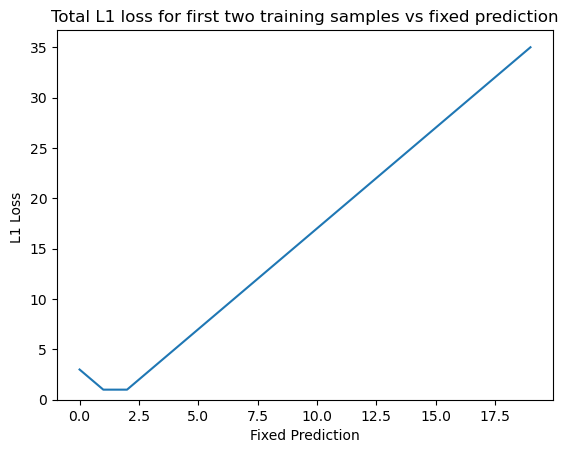

In [57]:
plt.plot(xs, [sum(abs(x - v) for v in data[:2]) for x in xs])
plt.gca().set_ylim(0)
plt.title("Total L1 loss for first two training samples vs fixed prediction")
plt.xlabel("Fixed Prediction")
plt.ylabel("L1 Loss ")
None 

See how the loss goes down until the prediction is 1, then it is flat until the next data point at 2. Then it goes up quickly when the prediction is greater than 2. 

Why is it flat in the middle? Because the increase in the loss function with the "one" data point is exactly counterbalanced by the decrease in the loss function with the "two" data point. 

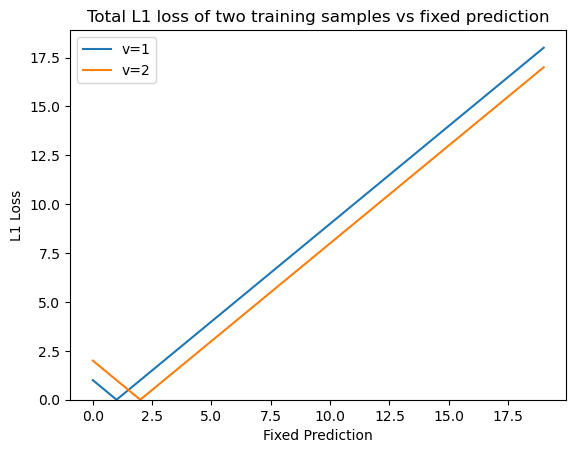

In [58]:
for v in data[:2]:
    plt.plot(xs, [abs(x - v) for x in xs], label=f"v={v}")

plt.gca().set_ylim(0)
plt.legend()
plt.title("Total L1 loss of two training samples vs fixed prediction")
plt.xlabel("Fixed Prediction")
plt.ylabel("L1 Loss")
None 

With the full dataset, the loss function is increasing if there are more data points below the prediction than above the prediction. If you remember calculus and derivatives, the slope is exactly the number of dataoitns below the prediction minus the number of data points above the prediction.

So the slope is zero, which means it is flat or level when the same number of data points are above and below the prediction, which is the median. 

One difference with the L2 optimization is that if you have an even number of data points, then the loss function will stop changing once you get to a prediction between the middle points. Any value in that range is equally good.  There is none of the tie-breaking or interpolation that we talked about for quantiles last week.

If you look at two distinct X values, then optimizing L1 will draw a line between any pair of acceptable median values for the two X values. When we consider the general case with many inputs, we can say something stronger and less hand-wavy. When optimizing with L1 loss and your model has an additive constant, like this fixed prediction case, or a inear model, or almost any other model, the optimized result will have the same number of predictions over and under the target values. For rephrasing, the median residual will be optimized to zero. If it is not zero, then you can still optimize the additive constant to make that happen. 

### Deep Learning, Chapter 4.3: Gradient-Based Optimization

Most deep learning algorithms involve optimization of some sort. Optimization refers to the task of either minimizing or maximizing some function $f(x)$ by altering $x$. We usually phrase most optimization problems in terms of minimizing $f(x)$. Maximization may be accomplished via a minimization algorithm by minimizing $-f(x)$.

The function we want to minimize or maximize is called the **objective function**, or **criterion**. When we are minimizing it, we may also call it the **cost function**, **loss function**, or **error function**. In this book, we use these terms interchangeably, though some machine learning publications assign special meaning to some of these terms.

We often denote the value that minimizes or maximizes a function with a superscript *. For example, we might say $x^* = \arg \min f(x)$.

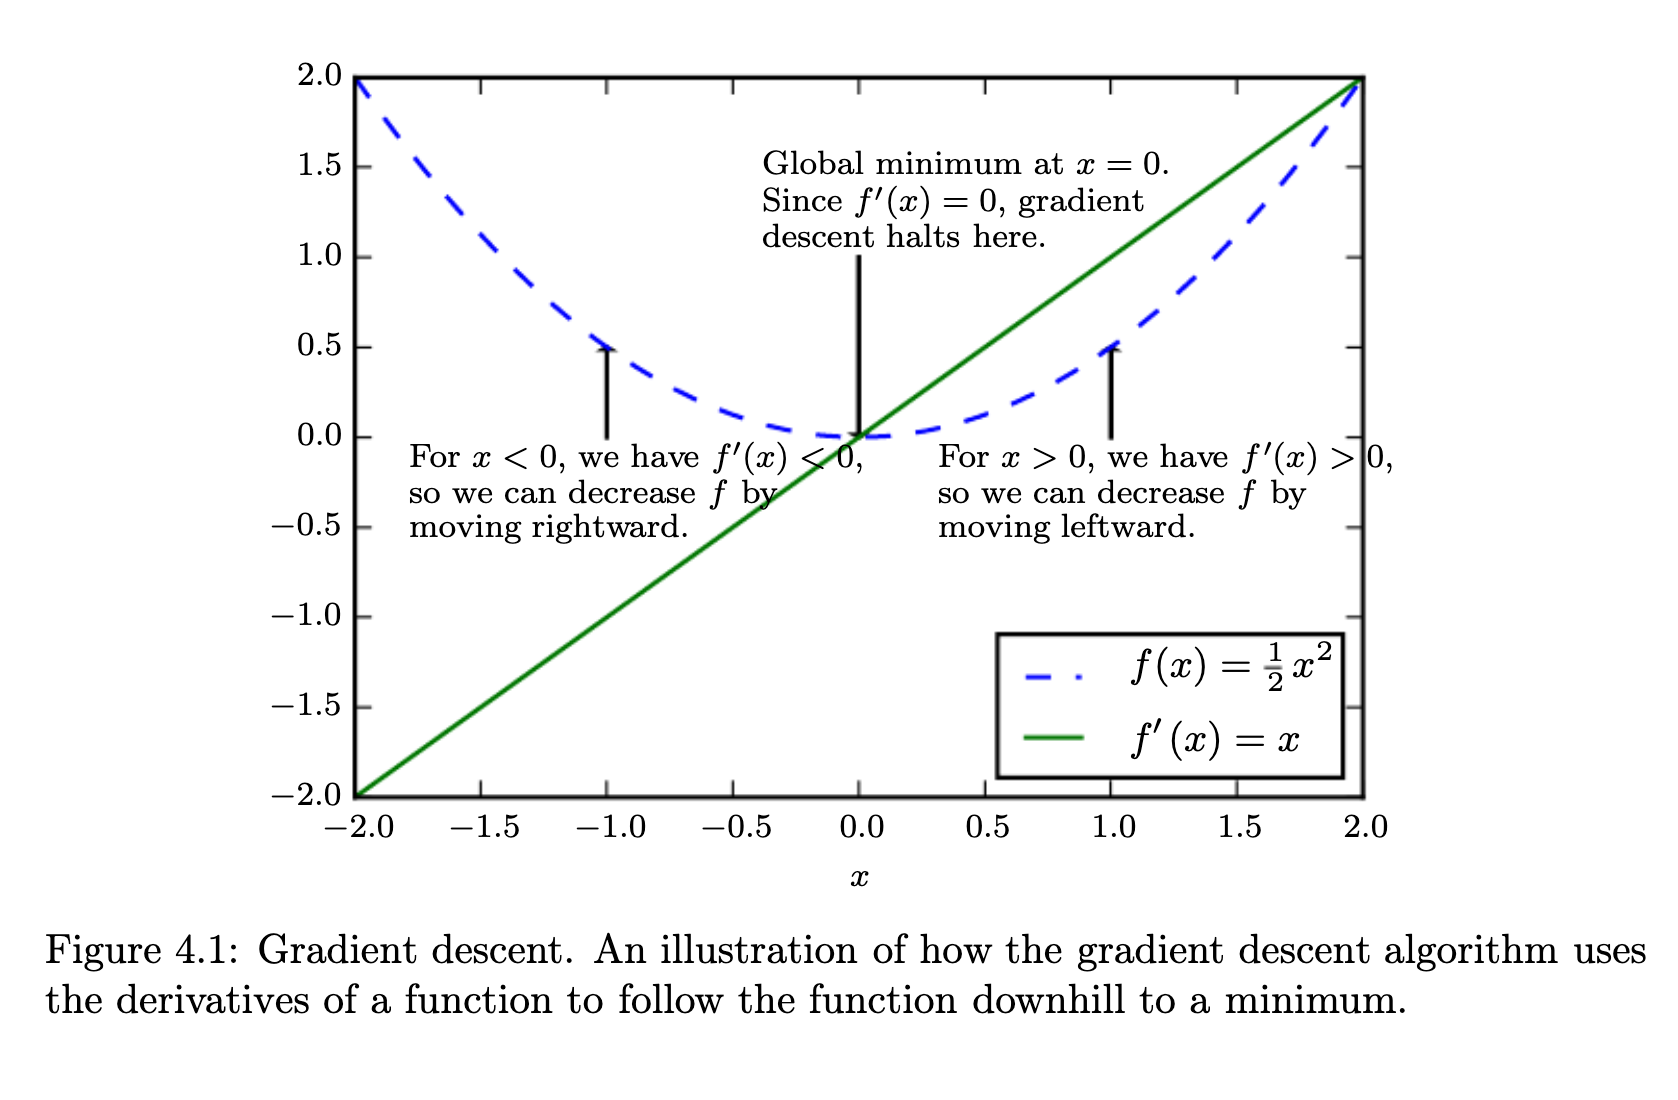

We assume the reader is already familiar with calculus but provide a brief review of how calculus concepts relate to optimization here.

Suppose we have a function $y = f(x)$, where both $x$ and $y$ are real numbers. The **derivative** of this function is denoted as $f'(x)$ or as $\frac{dy}{dx}$. The derivative $f'(x)$ gives the slope of $f(x)$ at the point $x$. In other words, it specifies how to scale a small change in the input to obtain the corresponding change in the output: 

$$
f(x + \epsilon) \approx f(x) + \epsilon f'(x).
$$

The derivative is therefore useful for minimizing a function because it tells us how to change $x$ in order to make a small improvement in $y$. For example, we know that $f(x - \epsilon \, \text{sign}(f'(x)))$ is less than $f(x)$ for small enough $\epsilon$. We can thus reduce $f(x)$ by moving $x$ in small steps with the opposite sign of the derivative. This technique is called **gradient descent** ([Cauchy, 1847](https://en.wikipedia.org/wiki/Augustin-Louis_Cauchy)). See figure 4.1 for an example of this technique.

When $f'(x) = 0$, the derivative provides no information about which direction to move. Points where $f'(x) = 0$ are known as **critical points**, or **stationary points**. A **local minimum** is a point where $f(x)$ is lower than at all neighboring points, so it is no longer possible to decrease $f(x)$ by making infinitesimal steps. A **local maximum** is a point where $f(x)$ is higher than at all neighboring points.

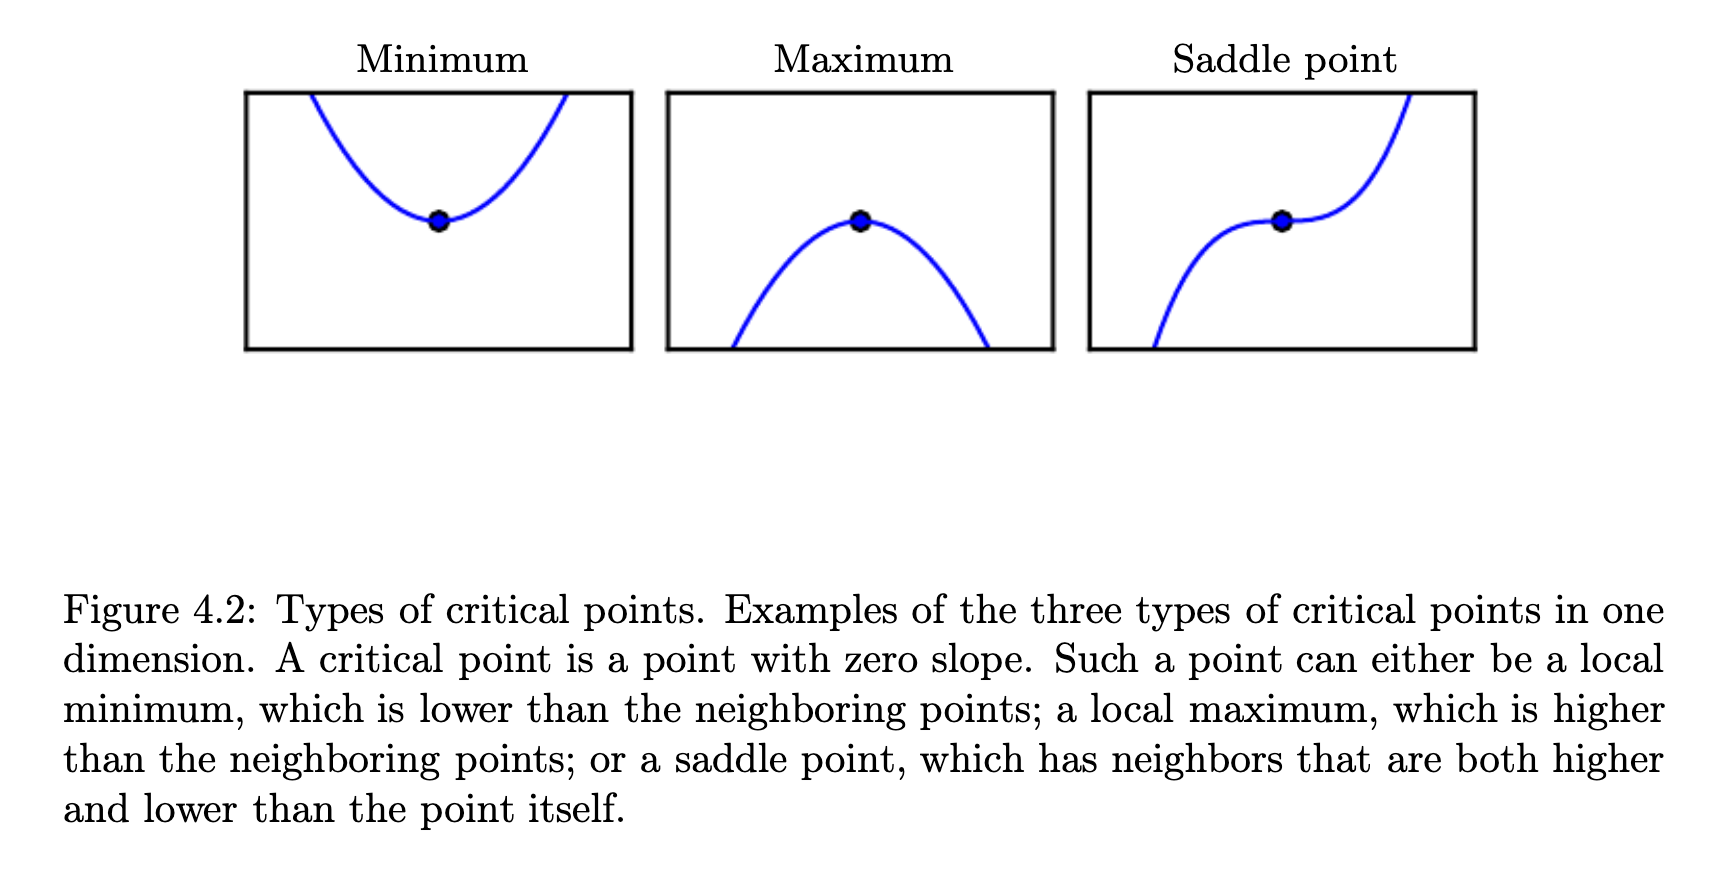


so it is not possible to increase $f(x)$ by making infinitesimal steps. Some critical points are neither maxima nor minima. These are known as **saddle points**. See figure 4.2 for examples of each type of critical point.

A point that obtains the absolute lowest value of $f(x)$ is a **global minimum**. There can be only one global minimum or multiple global minima of the function. It is also possible for there to be local minima that are not globally optimal. In the context of deep learning, we optimize functions that may have many local minima that are not optimal and many saddle points surrounded by very flat regions. All of this makes optimization difficult, especially when the input to the function is multidimensional. We therefore usually settle for finding a value of $f$ that is very low but not necessarily minimal in any formal sense. See figure 4.3 for an example.

We often minimize functions that have multiple inputs: $f : \mathbb{R}^n \to \mathbb{R}$. For the concept of "minimization" to make sense, there must still be only one (scalar) output.

For functions with multiple inputs, we must make use of the concept of **partial derivatives**. The partial derivative $\frac{\partial}{\partial x_i} f(x)$ measures how $f$ changes as only the variable $x_i$ increases at point $x$. The **gradient** generalizes the notion of derivative to the case where the derivative is with respect to a vector: the gradient of $f$ is the vector containing all the partial derivatives, denoted $\nabla_x f(x)$. Element $i$ of the gradient is the partial derivative of $f$ with respect to $x_i$. In multiple dimensions, 

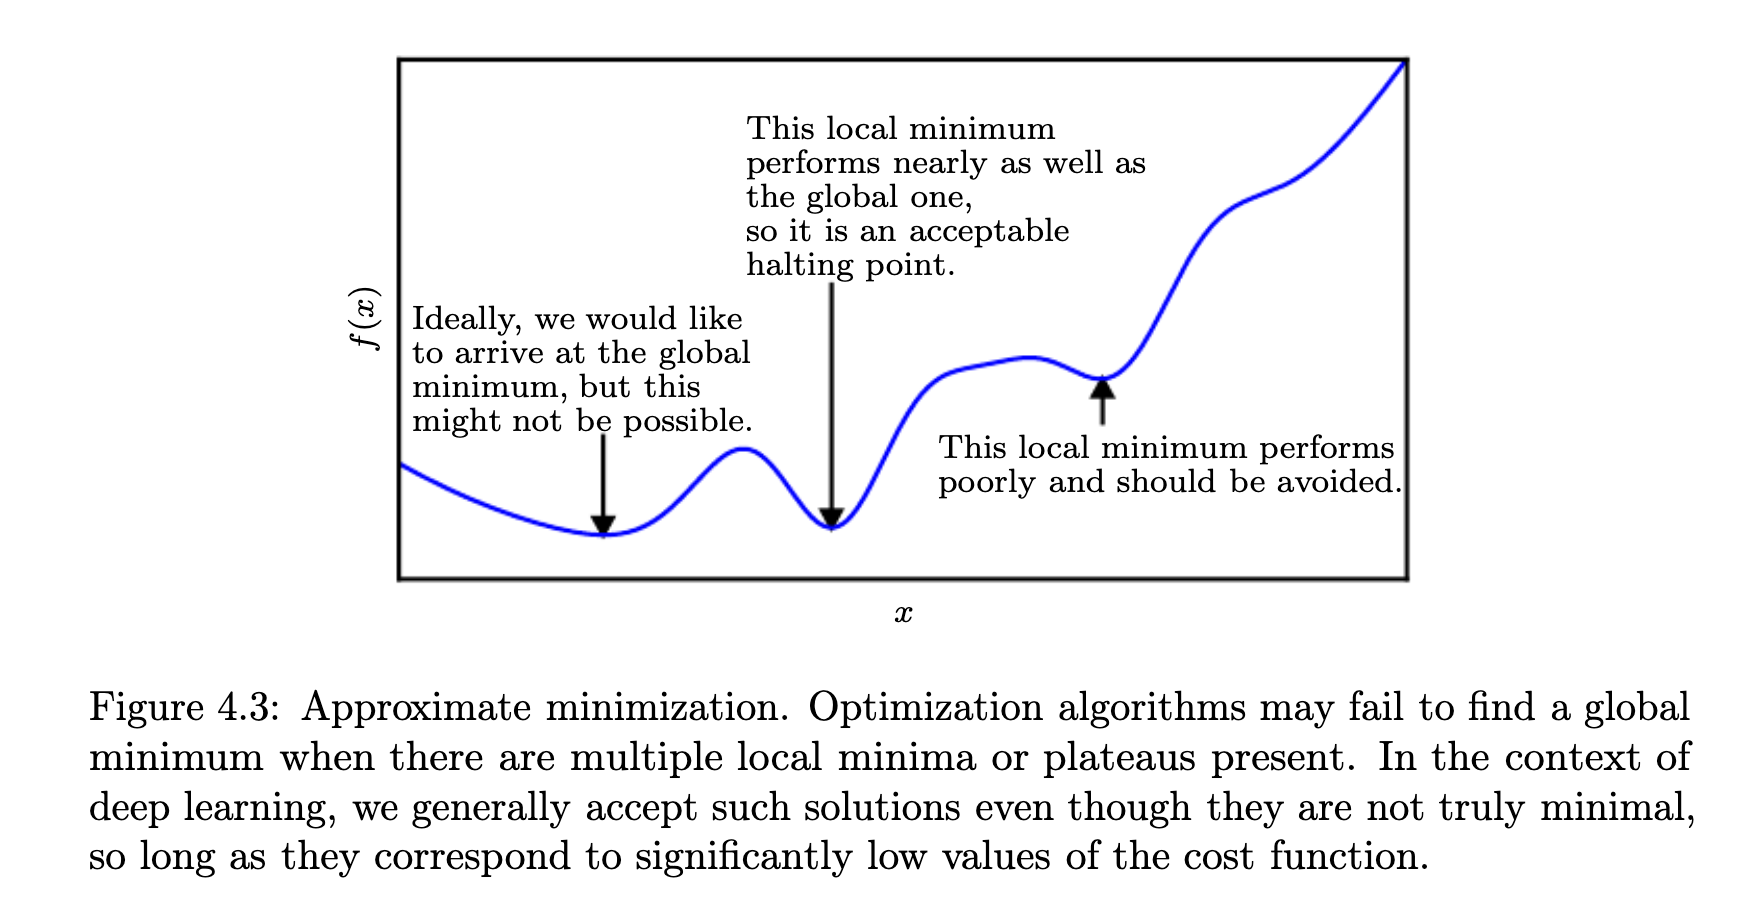

critical points are points where every element of the gradient is equal to zero.

The **directional derivative** in direction $\mathbf{u}$ (a unit vector) is the slope of the function $f$ in direction $\mathbf{u}$. In other words, the directional derivative is the derivative of the function $f(\mathbf{x} + \alpha \mathbf{u})$ with respect to $\alpha$, evaluated at $\alpha = 0$. Using the chain rule, we can see that $\frac{\partial}{\partial \alpha} f(\mathbf{x} + \alpha \mathbf{u})$ evaluates to $\mathbf{u}^\top \nabla_{\mathbf{x}} f(\mathbf{x})$ when $\alpha = 0$.

To minimize $f$, we would like to find the direction in which $f$ decreases the fastest. We can do this using the directional derivative:

$$
\min_{\mathbf{u}, \mathbf{u}^\top \mathbf{u}=1} \mathbf{u}^\top \nabla_{\mathbf{x}} f(\mathbf{x}) \tag{4.3}
$$

$$
= \min_{\mathbf{u}, \mathbf{u}^\top \mathbf{u}=1} \|\mathbf{u}\|_2 \|\nabla_{\mathbf{x}} f(\mathbf{x})\|_2 \cos \theta \tag{4.4}
$$

where $\epsilon$ is the **learning rate**, a positive scalar determining the size of the step. We can choose $\epsilon$ in several different ways. A popular approach is to set $\epsilon$ to a small constant. Sometimes, we can solve for the step size that makes the directional derivative vanish. Another approach is to evaluate $f(x - \epsilon \nabla_{\mathbf{x}} f(\mathbf{x}))$ for several values of $\epsilon$ and choose the one that results in the smallest objective function value. This last strategy is called a **line search**.

Steepest descent converges when every element of the gradient is zero (or, in practice, very close to zero). In some cases, we may be able to avoid running this iterative algorithm and just jump directly to the critical point by solving the equation $\nabla_{\mathbf{x}} f(\mathbf{x}) = 0$ for $\mathbf{x}$.

Although gradient descent is limited to optimization in continuous spaces, the general concept of repeatedly making a small move (that is approximately the best small move) toward better configurations can be generalized to discrete spaces. Ascending an objective function of discrete parameters is called **hill climbing** ([Russell and Norvig, 2003](https://www.amazon.com/Artificial-Intelligence-Modern-Approach-3rd/dp/0136042597)).

# 3.8 Lesson: $R^2$ Score (R Squared)

**What is $R^2$?**

$R^2$ is a measure invented in 1921 by Sewall Wright and is more formally known as the coefficient of determination. Intuitively, $R^2$ is meant to explain how much of the variation of a target variable is predicted by the model. An $R^2$ of one means that the target was perfectly predicted, and the model output exactly matches the targets. An $R^2$ of zero means that none of the variation was predicted; just predicting the average target value gives an $R^2$ of zero. In between, there is a continuum of models improving their predictions from $R^2=0$ to $R^2=1$. An $R^2$ over one is not possible, while a negative $R^2$ would mean the model was worse than just predicting the average.

$R^2$ has a long history of use in statistics. In business contexts, it has long been used as a quick comparison between models, but savvy business operators always follow up with the question "How much will this help the business?" after screening out the worst models. That is to say, $R^2$ can act as a screening mechanism before applying a more idiosyncratic analysis.

In the scikit-learn library that you will learn about in Module 2: Programming Toolkit for Data Science, many of the models will calculate the $R^2$ measure in the score method after fitting the model.

### Definitions

The following definitions assume a dataset of input vectors $\mathbf{x}_i$ and targets $y_i$ (collectively $\mathbf{y}$), and a function $f$ being evaluated.

#### Definition: residual sum of squares
The residual sum of squares is

$$
RSS = \sum_i \left( f(\mathbf{x}_i) - y_i \right)^2
$$

Note that this is the sum of the $L_2$ losses.

#### Definition: total sum of squares
The total sum of squares is

$$
TSS = \sum_i \left( y_i - \text{mean}(y) \right)^2
$$

Note that this is the numerator in calculation of the variance of $\mathbf{y}$.

#### Definition: coefficient of determination ($R^2$)
The coefficient of determination is

$$
R^2 = 1 - \frac{RSS}{TSS}
$$

Expanding the definitions for residual and total sums of squares,

$$
R^2 = 1 - \frac{\sum_i \left( f(\mathbf{x}_i) - y_i \right)^2}{\sum_i \left( y_i - \text{mean}(y) \right)^2}
$$

and dividing the numerator and denominator of that fraction by the number of samples gives

$$
R^2 = 1 - \frac{\text{mean}\left( L_2(f(\mathbf{x}), y) \right)}{\text{var}(y)}
$$

### Equivalence of Optimizing $R^2$ and $L_2$

Given the last formula for $R^2$, and noting that the variance of $\mathbf{y}$ is a fixed quantity, then $R^2$ is maximized by minimizing the average $L_2$ loss. So optimizing $R^2$ is the same as optimizing $L_2$, but they are optimized in different directions. In practice, $L_2$ is used since it is a simpler function and also to stay consistent with minimizing loss functions. But if a coworker wants to hear performance in terms of $R^2$, you can report that easily and know that it was optimized too.

**What is the maximum value of $R^2$?**  
The minimum value of the $L_2$ loss will be zero with perfect predictions, so the maximum $R^2$ is one.

**What is the minimum value of $R^2$?**  
There is no lower bound, since models worse than flat predictions can be arbitrarily bad.

R-Squared or Coefficient of Determination | Regression | Probability and Statistics | Khan Academy (12:40). This video walks through the process of motivating and calculating R2.

https://www.youtube.com/watch?v=lng4ZgConCM&ab_channel=KhanAcademy

In [59]:
import numpy as np

# Example data
y = np.array([2, 4, 6, 8, 10])

# Step 1: Calculate the mean of y
mean_y = np.mean(y)

# Step 2: Compute the predicted values using the model f(x_i) = mean(y) - y_i
y_pred = mean_y - y

# Step 3: Calculate RSS (Residual Sum of Squares)
rss = np.sum((y - y_pred) ** 2)

# Step 4: Calculate TSS (Total Sum of Squares)
tss = np.sum((y - mean_y) ** 2)

# Step 5: Compute R^2
r_squared = 1 - (rss / tss)

# Output the result
print(f"R^2: {r_squared}")

R^2: -7.5


In [60]:
mango_df = {'green_rating': [1,1,2,3,5,4,5,3], 'yellow_rating': [5,5,4,3,1,2,1,3], 
              'softness': [4,5,3,2,1,1,1,2], 'wrinkles': [0,1,1,0,1,1,1,1], 
              'estimated_flavor': [4,5,3,2,1,1,2,2], 'estimated_sweetness': [4,5,3,1,1,1,1,2]}

mango_data = pd.DataFrame(mango_df)

def f4(df):
    return 0.8 * df["yellow_rating"] + 0.2 * df["softness"]

p4 = abs(mango_data['rated_flavor']-1) for x in f4(mango_data)



SyntaxError: invalid syntax (1312253130.py, line 10)

In [64]:
import inspect
import unittest
import homework

import pandas


class P9TestCase(unittest.TestCase):
    def test_p9(self):
        self.assertTrue(hasattr(homework, "p9"), "Variable p9 is missing.")

        p9 = homework.p9
        self.assertFalse(isinstance(p9, type(...)), "Variable p9 was not set...")

        def check_output(input, output_expected):
            df = pandas.DataFrame(input)
            with self.subTest(input=input):
                output = list(p9(df))
                self.assertEqual(len(output), len(output_expected))

                for v, v_expected in zip(output, output_expected):
                    self.assertAlmostEqual(v, v_expected)

        check_output(
            {"yellow_rating": [0, 10, 20, 30], "estimated_flavor": [0, 10, 20, 30]},
            [0.0, 9.0, 18.0, 27.0],
        )
        check_output({"yellow_rating": [0.0], "estimated_flavor": [0.0]}, [0.0])
        check_output({"yellow_rating": [1.0], "estimated_flavor": [0.0]}, [0.5])
        check_output({"yellow_rating": [0.0], "estimated_flavor": [1.0]}, [0.4])

ModuleNotFoundError: No module named 'homework'

In [65]:
(0.5 * 5) + (0.4 * 5) 

4.5

In [68]:
#create dataframe
mango_df = {'green_rating': [1,1,2,3,5,4,5,3], 'yellow_rating': [5,5,4,3,1,2,1,3], 
              'softness': [4,5,3,2,1,1,1,2], 'wrinkles': [0,1,1,0,1,1,1,1], 
              'estimated_flavor': [4,5,3,2,1,1,2,2], 'estimated_sweetness': [4,5,3,1,1,1,1,2], 'rated_flavor': [5,1,3,2,1,1,1,2]}

mango_data = pd.DataFrame(mango_df)

#define functions
def f16a(df):
    return 1 * df['yellow_rating']

def f16b(df):
    return 0.4 * df['yellow_rating'] + 0.6 * df['estimated_sweetness']

def f16c(df):
    return 0.4 * df['yellow_rating'] + 0.2 * df['softness'] + 0.3 * df['estimated_sweetness']

def avgl1loss(y, x):
    return np.mean(abs(y - x))

y = mango_data['rated_flavor']


#calculate avgl1loss
a, b, c  = avgl1loss(y, f16a(mango_data)), avgl1loss(y, f16b(mango_data)), avgl1loss(y, f16c(mango_data))

#print the variable with the lowest l1 loss
print(min(a,b,c))

0.675


In [69]:
import pandas as pd
import numpy as np

# Create DataFrame
mango_df = {
    'green_rating': [1,1,2,3,5,4,5,3], 
    'yellow_rating': [5,5,4,3,1,2,1,3], 
    'softness': [4,5,3,2,1,1,1,2], 
    'wrinkles': [0,1,1,0,1,1,1,1], 
    'estimated_flavor': [4,5,3,2,1,1,2,2], 
    'estimated_sweetness': [4,5,3,1,1,1,1,2], 
    'rated_flavor': [5,1,3,2,1,1,1,2]
}

mango_data = pd.DataFrame(mango_df)

# Generalized function to calculate weighted combination
def weighted_prediction(df, yellow_weight=1, softness_weight=0, sweetness_weight=0):
    return (yellow_weight * df['yellow_rating'] +
            softness_weight * df['softness'] +
            sweetness_weight * df['estimated_sweetness'])

# Function to calculate average L1 loss
def avgl1loss(y, x):
    return np.mean(np.abs(y - x))

# Actual ratings
y = mango_data['rated_flavor']

# Define models with names
models = {
    'a': {'yellow_weight': 1, 'softness_weight': 0, 'sweetness_weight': 0},  # f16a
    'b': {'yellow_weight': 0.4, 'softness_weight': 0, 'sweetness_weight': 0.6},  # f16b
    'c': {'yellow_weight': 0.4, 'softness_weight': 0.2, 'sweetness_weight': 0.3}  # f16c
}

# Calculate L1 losses for all models
losses = {name: avgl1loss(y, weighted_prediction(mango_data, **weights)) for name, weights in models.items()}

# Find the model with the minimum L1 loss
min_loss_name = min(losses, key=losses.get)

# Print the variable name (a, b, c) and its corresponding value
print(f"The model with the lowest L1 loss is '{min_loss_name}' with a loss of {losses[min_loss_name]}")

The model with the lowest L1 loss is 'c' with a loss of 0.675


In [3]:
import numpy as np
import pandas as pd

# Existing mango_data DataFrame
mango_df = {
    'green_rating': [1,1,2,3,5,4,5,3], 
    'yellow_rating': [5,5,4,3,1,2,1,3], 
    'softness': [4,5,3,2,1,1,1,2], 
    'wrinkles': [0,1,1,0,1,1,1,1], 
    'estimated_flavor': [4,5,3,2,1,1,2,2], 
    'estimated_sweetness': [4,5,3,1,1,1,1,2], 
    'rated_flavor': [5,1,3,2,1,1,1,2]
}

mango_data = pd.DataFrame(mango_df)

# Linear regression model for predicting 'rated_flavor' using 'estimated_flavor'
def f18(df):
    return 0.7 * df["estimated_flavor"]

# Predicted values
predicted_flavor = f18(mango_data)

# Actual values
y_actual = mango_data['rated_flavor']

# Step 1: Calculate the mean of actual values (mean of rated_flavor)
y_mean = np.mean(y_actual)

# Step 2: Calculate Residual Sum of Squares (RSS)
ss_res = np.sum((y_actual - predicted_flavor) ** 2)

# Step 3: Calculate Total Sum of Squares (TSS)
ss_tot = np.sum((y_actual - y_mean) ** 2)

# Step 4: Calculate R^2
r2 = 1 - (ss_res / ss_tot)

# Print the manually calculated R^2
print(f"Manually calculated R^2: {r2:.16f}")

Manually calculated R^2: 0.0742857142857142


In [ ]:
0.07428571428571418
0.0742857142857144

In [4]:
mango_data

,green_rating,yellow_rating,softness,wrinkles,estimated_flavor,estimated_sweetness,rated_flavor
0,1,5,4,0,4,4,5
1,1,5,5,1,5,5,1
2,2,4,3,1,3,3,3
3,3,3,2,0,2,1,2
4,5,1,1,1,1,1,1
5,4,2,1,1,1,1,1
6,5,1,1,1,2,1,1
7,3,3,2,1,2,2,2


In [5]:
from sklearn.metrics import r2_score
p18 = r2_score(mango_data['rated_flavor'], f18(mango_data))
print(p18, 0.0742857142857144)

0.07428571428571418 0.0742857142857144


In [6]:
p7 = [{"a": 2, "b": 52, "c": 123},
      {"a": 5, "b": 52, "c": 321},
      {"a": 4, "b": 52, "c": 456},
      {"a": 1, "b": 52, "c": 513},
      {"a": 3, "b": 52, "c": 999},]

In [17]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from sklearn.metrics import r2_score

#Mango_Data
mango_df = {
    'green_rating': [1,1,2,3,5,4,5,3], 
    'yellow_rating': [5,5,4,3,1,2,1,3], 
    'softness': [4,5,3,2,1,1,1,2], 
    'wrinkles': [0,1,1,0,1,1,1,1], 
    'estimated_flavor': [4,5,3,2,1,1,2,2], 
    'estimated_sweetness': [4,5,3,1,1,1,1,2], 
    'rated_flavor': [5,1,3,2,1,1,1,2]
}

# slog it to a DataFrame
mango_data = pd.DataFrame(mango_df)

def mango_prediction_model(df):
    return 0.7 * df["estimated_flavor"]

#calculate pearson's correlation
from scipy.stats import pearsonr
mango_data_pearsonr = pearsonr(mango_data['rated_flavor'], mango_prediction_model(mango_data))

#calculate r2_score
mango_r2_score = r2_score(mango_data['rated_flavor'], mango_prediction_model(mango_data))

#print results
print("mango 'r2_score' is", mango_r2_score, "and", "mango_data pearsons correlation is", mango_data_pearsonr )

mango 'r2_score' is 0.07428571428571418 and mango_data pearsons correlation is PearsonRResult(statistic=0.42857142857142844, pvalue=0.28940322484679026)


In [18]:
mango_data_pearsonr 
pearsonr?

Signature: pearsonr(x, y, *, alternative='two-sided', method=None)
Docstring:
Pearson correlation coefficient and p-value for testing non-correlation.

The Pearson correlation coefficient [1]_ measures the linear relationship
between two datasets. Like other correlation
coefficients, this one varies between -1 and +1 with 0 implying no
correlation. Correlations of -1 or +1 imply an exact linear relationship.
Positive correlations imply that as x increases, so does y. Negative
correlations imply that as x increases, y decreases.

This function also performs a test of the null hypothesis that the
distributions underlying the samples are uncorrelated and normally
distributed. (See Kowalski [3]_
for a discussion of the effects of non-normality of the input on the
distribution of the correlation coefficient.)
The p-value roughly indicates the probability of an uncorrelated system
producing datasets that have a Pearson correlation at least as extreme
as the one computed from these datasets.


In [15]:
mango_r2_score

0.07428571428571418

In [19]:
mango_data.keys()

Index(['green_rating', 'yellow_rating', 'softness', 'wrinkles',
       'estimated_flavor', 'estimated_sweetness', 'rated_flavor'],
      dtype='object')

In [30]:
def p13(dictionaries, key):
    for x in dictionaries:
        if key in x and (x[key] == "" or x[key] is None):
            return x
    return None

In [35]:
mango_dict = [
    {'green_rating': None, 'yellow_rating': 5, 'softness': 4, 'Wrinkles' : 1, 'estimated_flavor': None, 'estimated_sweetness': 4, 'rated_flavor': 5},
    {'green_rating': 1, 'yellow_rating': 5, 'softness': 5, 'wrinkles': 1, 'estimated_flavor': 5, 'estimated_sweetness': 5, 'rated_flavor': 1},
    # ... other rows
]
p13(mango_dict, 'green_rating')

{'green_rating': None,
 'yellow_rating': 5,
 'softness': 4,
 'Wrinkles': 1,
 'estimated_flavor': None,
 'estimated_sweetness': 4,
 'rated_flavor': 5}

In [36]:
p13([{"a": None}], "a"), {"a": None}

({'a': None}, {'a': None})

In [38]:
p13([{"c": 4}, {"c": 234}, {"c": "1"}, {"c": False}, {"c": None}], "c")

{'c': None}

In [41]:
max(mango_dict[0], "yellow_rating")

TypeError: '>' not supported between instances of 'str' and 'dict'

In [47]:
green_rating = dict(mango_data['green_rating'], key)

In [48]:
green_flavor

{0: 1, 1: 1, 2: 2, 3: 3, 4: 5, 5: 4, 6: 5, 7: 3}

In [49]:
dict?

Init signature: dict(self, /, *args, **kwargs)
Docstring:     
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)
Type:           type
Subclasses:     OrderedDict, defaultdict, Counter, _EnumDict, Bunch, StgDict, _Quoter, ObjectDict, ConvertingDict, Config, ...

In [53]:
green_rating = {'green_rating': [1, 1, 2, 3, 5, 4, 5, 3]}
max(green_rating, lambda r: r["green_rating"])

TypeError: '>' not supported between instances of 'function' and 'dict'

In [55]:
green_rating = {0: 1, 1: 1, 2: 2, 3: 3, 4: 5, 5: 4, 6: 5, 7: 3}
green_list_dict = [{'green_rating': value} for value in green_rating.values()]
green_list_dict

[{'green_rating': 1},
 {'green_rating': 1},
 {'green_rating': 2},
 {'green_rating': 3},
 {'green_rating': 5},
 {'green_rating': 4},
 {'green_rating': 5},
 {'green_rating': 3}]

In [65]:
green_max = max(green_list_dict, lambda r: r["green_rating"])

TypeError: '>' not supported between instances of 'function' and 'list'

In [57]:
def p10(dictionaries, score_function):
    return max(dictionaries, key=score_function)

In [61]:
p10([{'green_rating': 1},
 {'green_rating': 1},
 {'green_rating': 2},
 {'green_rating': 3},
 {'green_rating': 5},
 {'green_rating': 4},
 {'green_rating': 5},
 {'green_rating': 3}],
   lambda r: r['green_rating'])

{'green_rating': 5}

In [63]:
p10(green_list_dict, lambda r: r['green_rating'])

{'green_rating': 5}

In [66]:
def p3(seq):
    return [x for x in seq if x is not None and not x]
p3([0, 1, 2, None, 4, "a", "b", False, True])

[0, False]

In [70]:
def p3(seq):
    return [x for x in seq if x is not Noneone and not x]
p3([0, 1, 2, None, 4, "a", "b", False, True])

[]

In [71]:
bool(0)

False

In [72]:
bool(1)

True

In [74]:
bool([])

False